## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_InitialDoE_Feb.csv', firstRow=132, lastRow=138)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_140223_S133-138.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse water addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=100s and ended at t=502s; mass=43.48775g
This equals a volume of 43.575m; expected was 44.329mL; error is 1.701%


## Analyise surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.00020833333333333332 g/s^2


<IPython.core.display.Javascript object>


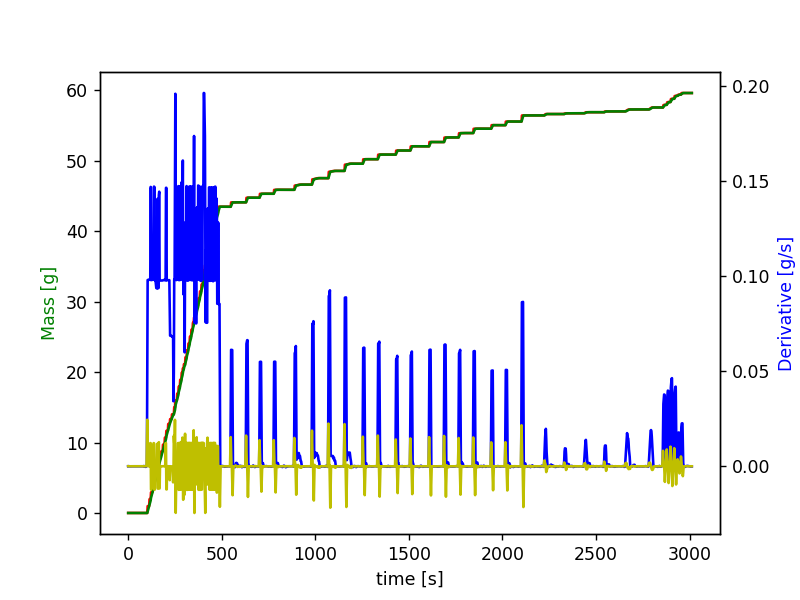

Addition of 0.628g Dehyton PK 45 detected from 544s to 590s - expected volume = 0.609mL and actual volume = 0.597mL (resulting error is 1.922%)
Addition of 0.66g Dehyton PK 45 detected from 626s to 650s - expected volume = 0.609mL and actual volume = 0.628mL (resulting error is 3.141%)
Addition of 0.565g Dehyton PK 45 detected from 698s to 728s - expected volume = 0.527mL and actual volume = 0.532mL (resulting error is 0.839%)
Addition of 0.567g Dehyton PK 45 detected from 774s to 806s - expected volume = 0.527mL and actual volume = 0.534mL (resulting error is 1.25%)
Addition of 0.74g Dehyton ML detected from 884s to 932s - expected volume = 0.914mL and actual volume = 0.69mL (resulting error is 24.49%)
Addition of 0.914g Dehyton ML detected from 978s to 1028s - expected volume = 0.858mL and actual volume = 0.853mL (resulting error is 0.62%)
Addition of 1.032g Dehyton ML detected from 1066s to 1114s - expected volume = 0.943mL and actual volume = 0.964mL (resulting error is 2.188%)
Add

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


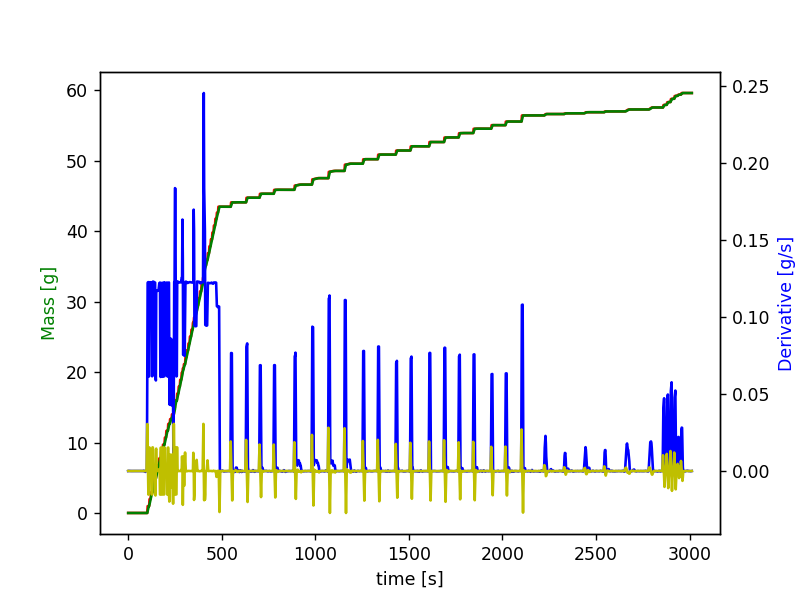

Addition of 0.194g Luviquat Excellence detected from 2220s to 2244s - expected volume = 0.199mL and actual volume = 0.175mL (resulting error is 11.875%)
Addition of 0.107g Luviquat Excellence detected from 2252s to 2358s - expected volume = 0.089mL and actual volume = 0.095mL (resulting error is 6.625%)
Addition of 0.164g Luviquat Excellence detected from 2432s to 2472s - expected volume = 0.145mL and actual volume = 0.148mL (resulting error is 2.578%)
Addition of 0.117g Luviquat Excellence detected from 2540s to 2574s - expected volume = 0.1mL and actual volume = 0.106mL (resulting error is 6.364%)
Addition of 0.273g Luviquat Excellence detected from 2652s to 2686s - expected volume = 0.254mL and actual volume = 0.248mL (resulting error is 2.366%)
Addition of 0.282g Luviquat Excellence detected from 2778s to 2810s - expected volume = 0.252mL and actual volume = 0.253mL (resulting error is 0.536%)


In [4]:
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=6, mergeSens=6, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.0011250000000000001 g/s^2


<IPython.core.display.Javascript object>


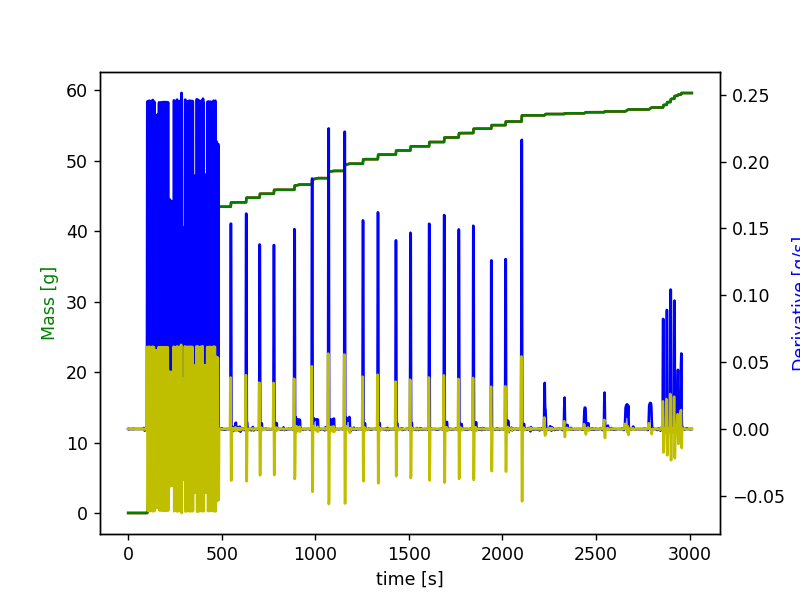

Addition of 0.377g Arlypon TT detected from 2854s to 2870s - expected volume = 0.427mL and actual volume = 0.392mL (resulting error is 8.171%)
Addition of 0.398g Arlypon TT detected from 2874s to 2890s - expected volume = 0.371mL and actual volume = 0.41mL (resulting error is 10.417%)
Addition of 0.463g Arlypon TT detected from 2894s to 2910s - expected volume = 0.448mL and actual volume = 0.482mL (resulting error is 7.674%)
Addition of 0.417g Arlypon TT detected from 2914s to 2930s - expected volume = 0.396mL and actual volume = 0.435mL (resulting error is 9.737%)
Addition of 0.178g Arlypon TT detected from 2932s to 2946s - expected volume = 0.115mL and actual volume = 0.185mL (resulting error is 61.364%)
Addition of 0.225g Arlypon TT detected from 2950s to 2964s - expected volume = 0.197mL and actual volume = 0.234mL (resulting error is 18.684%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=9, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_S133-S138.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_26200\843887572.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
132,133.0,0.0,0.0,0.0,0.0,0.0,0.0,12.803136,0.000000,0.00000,0.00000,12.621200,0.000000,1.927479,0.0,0.0,0.0,0.0,3.743113
133,134.0,0.0,0.0,0.0,0.0,0.0,0.0,11.227339,0.000000,0.00000,0.00000,0.000000,10.151927,1.057802,0.0,0.0,0.0,0.0,3.943507
134,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,7.458456,13.10874,0.00000,0.000000,0.000000,1.654215,0.0,0.0,0.0,0.0,4.666574
135,136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9.003726,0.00000,11.63207,0.000000,0.000000,1.152178,0.0,0.0,0.0,0.0,4.106479
136,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10.056343,0.00000,0.00000,12.165827,0.000000,2.663650,0.0,0.0,0.0,0.0,1.729484
137,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10.100217,0.00000,0.00000,0.000000,8.638784,2.768463,0.0,0.0,0.0,0.0,2.217721
